## Discussing multivariate analysis using the Titanic dataset
 - Titanic 데이터 세트를 분석하고, 승객의 생존여부에 영향을 미치는 속성(feature)을 식별해보는 chapter
 - 분류 예측 Problem

1) 데이터 프레임의 이해
- 각 행은 탑승객 1인별 정보를 나타내며 아래와 같은 속성값을 가짐
- 속성(attribute)<br>
   -. PassengerId : 탑승객 Id<br>
   -. Survived : 탑승객의 생존 여부. 즉 예측해야 할 종속 변수(0: 사망, 1 : 생존)<br>
   -. PClass : 탑승객 Class 정보<br>
   -. Name : 탑승객의 이름<br>
   -. Sex : 탑승객의 성별<br>
   -. Age : 탑승객의 나이<br>
   -. Sibsp : 탑승한 형제 자매 / 배우자 수<br>
   -. Parch : 탑승한 부모 / 자녀 수<br>
   -. Ticket : 티켓 번호<br>
   -. Fare : 티켓 운임 요금<br>
   -. Cabin : 객실 번호<br>
   -. Embarked : 탑승객의 승선 위치(C : Cherbourg, S : Southhampton, Q : Queenstown)<br>

2) 분석에 필요한 library import / 데이터 Loading
 - 데이터 분석을 위한 라이브러리를 import 하고 데이터를 Loding한다. <br>
 - 여기서는 미리 다운받은 titanic.csv 파일을 이용한다.<br>

In [1]:
## 필요한 라이브러리 import
import pandas as pd 
import numpy as np
import seaborn as sns            
import matplotlib.pyplot as plt 

## Data를 Loading하고 상위 5개 Row에 대해 보여준다
titanic = pd.read_csv('titanic.csv')  ## Data Loading
titanic.head() ## 상위 5개 Row(디폴트)에 대해 데이터 프레임 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
## 해당 데이터 프레임의 구조를 확인한다. => shape 메서드를 활용
titanic.shape  ## 891개의 행과 12개의 열을 가진 dataframe임을 확인할 수 있음

(891, 12)

In [3]:
## isnull() 메서드를 활용하여 각 컬럼의 결측치 총 합계(sum)를 내림차 순(descending) 확인한다.
## 확인 결과 Cabin, Age, Embarked 컬럼에 결측치가 있음을 확인할 수 있다.
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [4]:
# 아래와 같이 수행 시, 결측치가 존재하는 비율을 확인할 수 있다.
# 결측치가 많이 존재하는 Cabin의 경우, 77%에 해당하는 결측치를 가지고 있고, 생존 여부에 영향을 미치는 feature일 수도 있고 아닐수도 있으나, 일단   
# 결측치가 많으므로 EDA 분석대상 우선순위 배제 후, 필요 시 추가 분석 수행 고려
# Age(나이)의 경우, 생존 여부에 영향을 미치는 feature로 고려 해볼 수 있으므로, 결측치 처리 방안 고민 필요
# Embarked(탑승객 탑승 위치)의 경우, 총 2건으로 0.2%로 결측값의 차지 비율이 낮기 때문에, 결측치 처리 방안 고민 필요    
round(titanic.isnull().sum().sort_values(ascending=False) / len(titanic), 3)

Cabin          0.771
Age            0.199
Embarked       0.002
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

In [5]:
## 각 성별 생존율을 확인한다. (각 성별 생존자 수 / 각 성별 총 탑승객 수))
m_titanic = len(titanic.loc[titanic['Sex'] == 'male'])   ## 총 남성 탑승객 수
w_titanic = len(titanic.loc[titanic['Sex'] == 'female']) ## 총 여성 탑승객 수
m_survived_tot = titanic.loc[titanic['Sex'] == 'male', 'Survived'].sum()    ## 남성 생존자 수
w_survived_tot = titanic.loc[titanic['Sex'] == 'female', 'Survived'].sum()  ## 여성 생존자 수

## 각 성별 생존율 구하기
print("The percentage of women's survived : ", w_survived_tot / w_titanic)
print("The percentage of men's survived : ", m_survived_tot / m_titanic)

The percentage of women's survived :  0.7420382165605095
The percentage of men's survived :  0.18890814558058924


</b>남성에 비해 여성의 생존률이 높은 것으로 보아, 성별(Sex)의 경우 생존 여부에 중요한 영향을 미치는 feature로 생각할 수 있음 

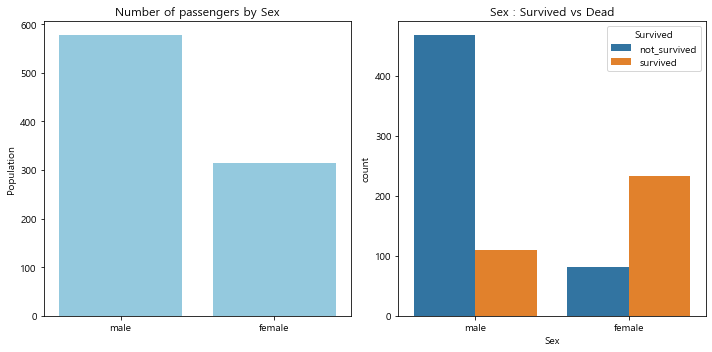

In [6]:
## 남성과 여성에 따른 생존자 수 관련 시각화
titanic['Survived'] = titanic['Survived'].apply(lambda x: 'not_survived' if x == 0 else 'survived') ## Survived 컬럼값 변형
# 한 화면에 여러 그래프를 나눠서 그려주는 기능인 matplotlib의 subplots 메서드를 활용
## 1행, 2열 형태의 subplot canvas를 만들고 그 사이즈는 (10,5)로 지정
fig, ax = plt.subplots(1,2, figsize=(10,5))  

## 성별에 따른 생존자 수 시각화(barplot활용)
sns.barplot(x=titanic['Sex'].value_counts().index, y=titanic['Sex'].value_counts().values, ax=ax[0], color='skyblue')
ax[0].set_title("Number of passengers by Sex")   ## plot title 지정
ax[0].set_ylabel("Population")  ## plot의 y축 레이블 설정

## hue옵션을 활용하여 성별에 따른 생존자/비 생존자 수를 시각화 한다
sns.countplot(data=titanic, x='Sex', hue='Survived', ax = ax[1])
ax[1].set_title("Sex : Survived vs Dead")
plt.tight_layout()  ## 명시된 여백에 관련된 서브플롯 파라미터 조정(여기서는 기본값으로 설정)
plt.show()

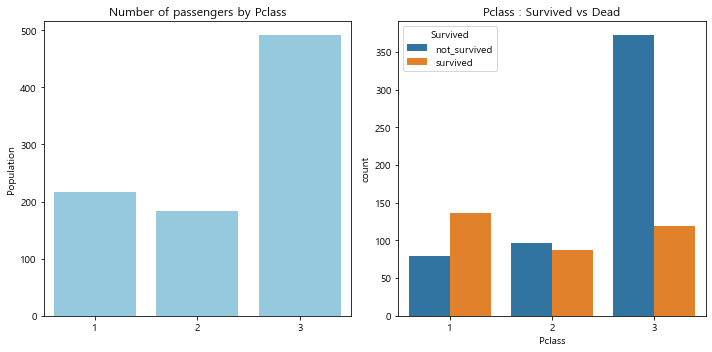

In [7]:
## Pclass에 따른 생존자 수 관련 시각화
fig, ax = plt.subplots(1,2, figsize=(10,5))  

## Pclass에 따른 생존자 수 시각화(barplot활용)
sns.barplot(x=titanic['Pclass'].value_counts().index, y=titanic['Pclass'].value_counts().values, ax=ax[0], color='skyblue')
ax[0].set_title("Number of passengers by Pclass")   ## plot title 지정
ax[0].set_ylabel("Population")  ## plot의 y축 레이블 설정

## hue옵션을 활용하여 Pclass에 따른 생존자/비 생존자 수를 시각화 한다
sns.countplot(data=titanic, x='Pclass', hue='Survived', ax = ax[1])
ax[1].set_title("Pclass : Survived vs Dead")
plt.tight_layout()  ## 명시된 여백에 관련된 서브플롯 파라미터 조정(여기서는 기본값으로 설정)
plt.show()

Pclass 3의 경우 탑승자 수는 많았으나 대부분 생존하지 못했고, Pclass 1의 경우 전체 탑승객 대비 생존자 수가 많았음을 확인할 수 있다. 따라서 Pclass는</br>
생존여부를 결정하는 중요한 feature로 고려해 볼 수 있다

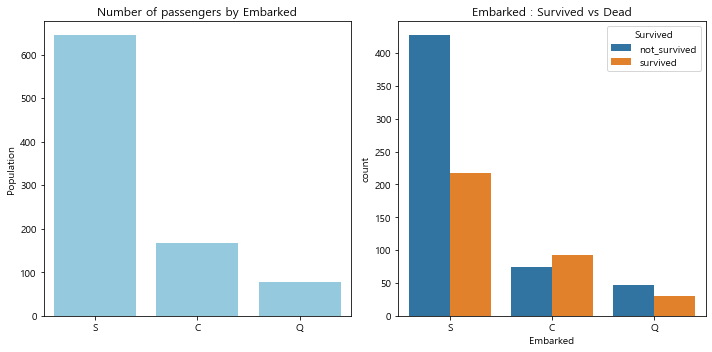

In [8]:
## Embarked에 따른 생존자 수 관련 시각화
fig, ax = plt.subplots(1,2, figsize=(10,5))  

## Embarked에 따른 생존자 수 시각화(barplot활용)
sns.barplot(x=titanic['Embarked'].value_counts().index, y=titanic['Embarked'].value_counts().values, ax=ax[0], color='skyblue')
ax[0].set_title("Number of passengers by Embarked")   ## plot title 지정
ax[0].set_ylabel("Population")  ## plot의 y축 레이블 설정

## hue옵션을 활용하여 Embarked에 따른 생존자/비 생존자 수를 시각화 한다
sns.countplot(data=titanic, x='Embarked', hue='Survived', ax = ax[1])
ax[1].set_title("Embarked : Survived vs Dead")
plt.tight_layout()  ## 명시된 여백에 관련된 서브플롯 파라미터 조정(여기서는 기본값으로 설정)
plt.show()

대부분의 탑승객들이 Southampton에서 탑승했으나 생존자 수는 그에 비해 낮았고, Cherbourg에서 탑승한 승객의 경우 상대적으로 높은 생존자 수를 나타냄</br>
탑승 위치별 탑승객의 성별 분포, Pclass등의 차이가 있을 수 있음을 가정하고 이를 연관지어 추가 분석 해볼 수 있을 것

<AxesSubplot:xlabel='Age', ylabel='Count'>

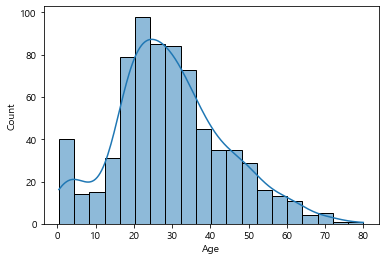

In [9]:
## Age 컬럼 분석을 위해 여기서는 결측값을 대체 처리하지 않고 삭제 후 분석
## 연속형 변수이므로 histogram을 이용하여 탑승객의 연령 분포를 확인해본다.
sns.histplot(titanic['Age'].dropna(), kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

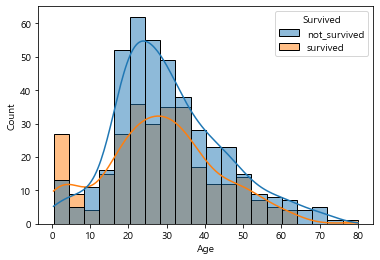

In [10]:
## ** 개별 분석(교재에 없는 내용)
## Age와 생존여부의 상관 관계를 살펴보기 위한 시각화
sns.histplot(x = "Age", data=titanic.loc[titanic['Age'].notnull()], hue='Survived', kde=True)

나이대별 생존자와 비 생존자의 분포가 유사한 패턴을 보이고 있어, 생존 여부를 결정하는 중요한 feature가 될 수 없을 것으로</br>
생각되나, 결측치 처리 후 다시 확인할 필요가 있음

<AxesSubplot:xlabel='Fare', ylabel='Count'>

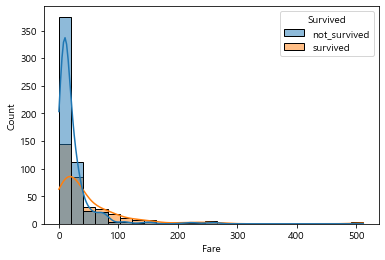

In [11]:
## ** 개별 분석(교재에 없는 내용)
## Fare와 생존여부의 상관 관계를 살펴보기 위한 시각화
sns.histplot(x = "Fare", data=titanic, hue='Survived', bins=25, kde=True)

- 낮은 Fare(요금)를 지불한 탑승객의 경우, 그렇지 않은 탑승객에 비해 생존률이 상대적으로 매우 낮았음을 알 수 있음

In [12]:
## ** 개별 분석(교재에 없는 내용)
## Name 속성에서 호칭 관련 부분만 따로 떼어 확인 => 결측값이 존재하는 나이 등을 채울때 활용할 수 있을 것..
passenger_name = pd.DataFrame(titanic['Name'].str.split(',' , expand=True))
passenger_name.rename(columns={0 : "Last Name", 1 : "First Name"}, inplace=True)
passenger_name['Call_Name'] = passenger_name['First Name'].str.split('.', expand=True).iloc[:, 0]
display(passenger_name)

,Last Name,First Name,Call_Name
0,Braund,Mr. Owen Harris,Mr
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,Heikkinen,Miss. Laina,Miss
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
4,Allen,Mr. William Henry,Mr
...,...,...,...
886,Montvila,Rev. Juozas,Rev
887,Graham,Miss. Margaret Edith,Miss
888,Johnston,"Miss. Catherine Helen ""Carrie""",Miss
889,Behr,Mr. Karl Howell,Mr


In [13]:
## Name 속성에서 호칭 관련 부분만 따로 떼어 기존 titanic 데이터 프레임과 열 기준으로 합침.
titanic_new = pd.concat([titanic, passenger_name['Call_Name']], axis=1)
titanic_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Call_Name
0,1,not_survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,not_survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,not_survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,not_survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [14]:
## 공백 제거(앞, 뒤)
titanic_new['Call_Name'] = titanic_new['Call_Name'].str.strip()

In [15]:
## 값이 별로 없는 categorical data 대체
titanic_new.loc[titanic_new['Call_Name'].isin(['Capt', 'Col', 'the Countess', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir']), 'Call_Name'] = 'Others'
titanic_new.loc[titanic_new['Call_Name'].isin(['Mlle', 'Ms']), 'Call_Name'] = 'Miss'
titanic_new.loc[titanic_new['Call_Name'].isin(['Don']), 'Call_Name'] = 'Mr'
titanic_new.loc[titanic_new['Call_Name'].isin(['Mme', 'Lady', 'Dona']), 'Call_Name'] = 'Mrs'

In [16]:
display(titanic_new['Call_Name'].value_counts())  ### 호칭별 탑승객 수
display(titanic_new.groupby('Call_Name')['Age'].mean()) ## 호칭별 탑승객 평균 나이

Mr        518
Miss      185
Mrs       127
Master     40
Others     21
Name: Call_Name, dtype: int64

Call_Name
Master     4.574167
Miss      21.845638
Mr        32.387218
Mrs       35.900000
Others    45.700000
Name: Age, dtype: float64

- Call_Name을 기준으로 Age의 결측치를 해당 평균값으로 대체해 볼 수 있을 것

<AxesSubplot:xlabel='Call_Name', ylabel='count'>

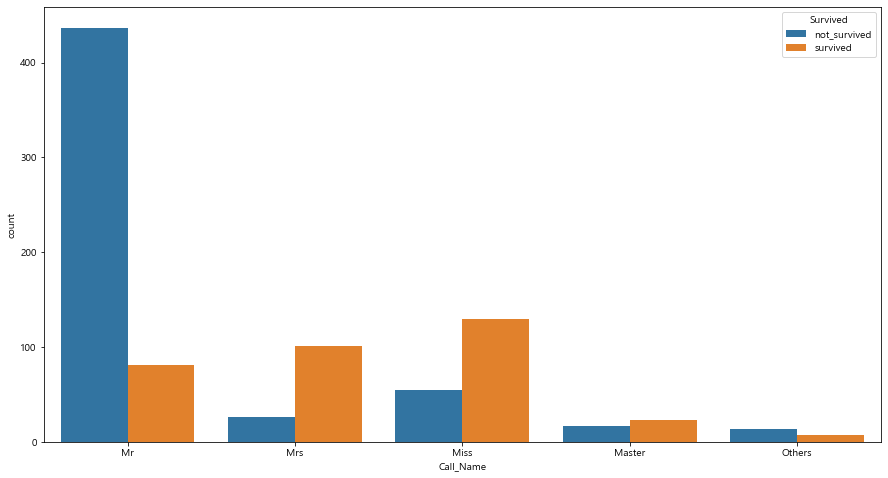

In [17]:
### Call_Name에 따른 생존자 / 비생존자 분석
plt.figure(figsize=(15,8))
sns.countplot(data=titanic_new, x='Call_Name', hue='Survived')

- Mrs, Miss Call_name을 가진 사람의 생존율이 높고, Mr Call_name을 가진 사람의 생존율은 극히 낮다
- 여성을 먼저 구하기 위한 노력이 많았음을 알 수 있음

<Figure size 2520x2520 with 0 Axes>

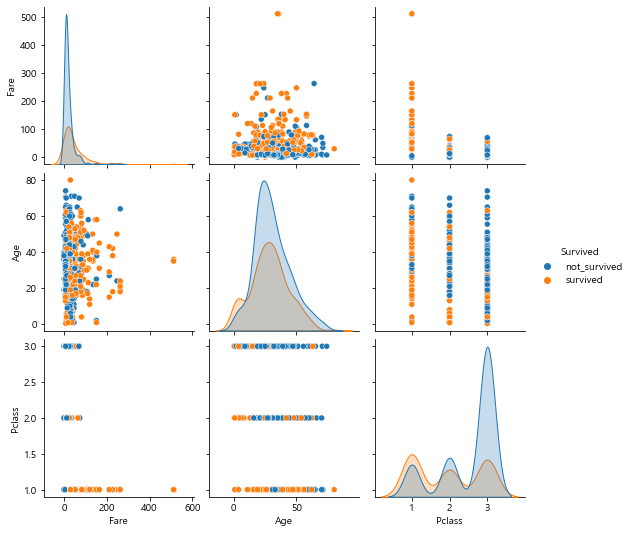

In [18]:
## Survived, Pclass, Fare 및 Age 변수를 이용한 다변량 분석 수행
plt.figure(figsize=(35,35))
sns.pairplot(titanic, vars=['Fare', 'Age', 'Pclass'], hue="Survived")

In [19]:
### 변수간 상관관계(correlation) 분석을 위하여 피어슨 상관계수를 활용
titanic['Survived'] = titanic['Survived'].apply(lambda x : 0 if x == "not_survived" else 1)  ## Survived 컬럼 정수 표현
titanic['Embarked'] = titanic['Embarked'].map({"S" : 1, "C" : 2, "Q" : 2, "NaN" : 0}) ## Embarked 컬럼을 correlation 분석 위해 정수형 표현
display(titanic)
print("=======================================================================================================")
display(titanic.corr(method='pearson'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2.0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022269
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.151777
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.076466
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.025431
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.069438
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.061512
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.163758
Embarked,-0.022269,0.151777,-0.076466,0.025431,-0.069438,-0.061512,0.163758,1.000000


- Embarked 컬럼의 경우, NaN이 포함되어 있어 변환시 float형으로 대체됨
- Fare와 Pclass의 경우 음의 상관관계가 상대적으로 뚜렷함(Pclass가 낮을수록(1등급) 높은 등급이므로 Fare가 고가)
- Pclass와 Survived 역시 상대적으로 약간 높은 음의 상관관계를 나타내며, Fare와는 상대적으로 약간 높은 양의 상관관계를 가짐

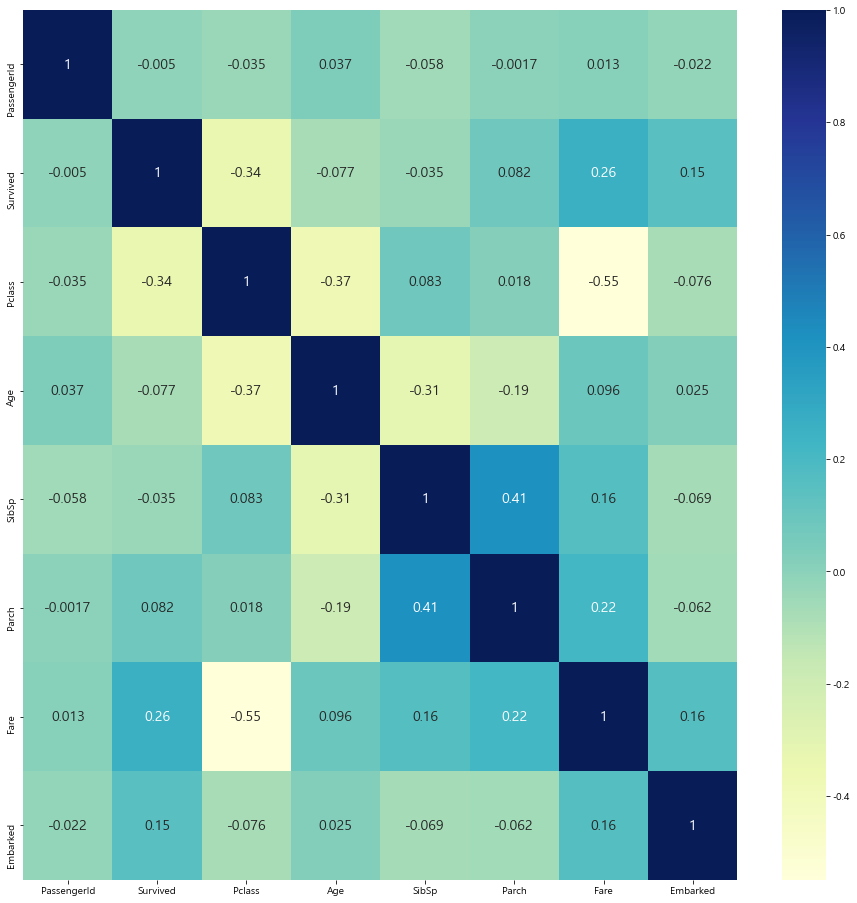

In [29]:
### correlation을 Heatmap 형태로 시각화
plt.figure(figsize=(16,16))
sns.heatmap(titanic.corr(method='pearson'), annot=True, cmap="YlGnBu", annot_kws={"size":14})
plt.show()